# Problem Description:

In this notebook, we apply the concepts of a Convolutional Neural Network to classify the images from the Fasion MNIST dataset, which is also available in the TensorFlow API. The dataset is composed of images of different clothes (10 categories) in black and white colors, therefore they are represented as a matrix of 3 dimensions as well (H x W x C). 

Another important aspect is that the CNNs make use of kernel filters to calculate the convolutions. The filter is moved across the data left to right, top to bottom. The amount of movement between applications of the filter to the input image is referred to as the stride. This has the effect of applying the filter in such a way that the normal feature map output is down-sampled.

Also, we start to work with the concept of Functional API of the TensorFlow in order to build the models.

The notebook is organized as follows:

1. Imports
2. Dataset
3. Build Model Using the Functional API
4. Evaluation

### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Number of GPUs Available: 1


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

### Dataset

In [6]:
# Load the Data

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Train shape: {x_train.shape}")

Train shape: (60000, 28, 28)


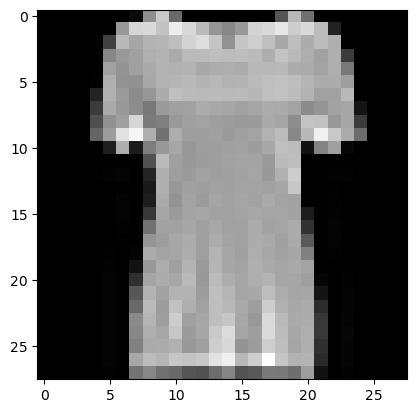

In [8]:
# Ploting the 10th image of the train set

plt.imshow(x_train[10], cmap='gray');

In [7]:
# The data is two dimensional, but the Conv2D layer expects the shape of H x W x C
# Since the data is black and white, we add a superfluous one dimension in the last position

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"New shape of the Train set: {x_train.shape}")

New shape of the Train set: (60000, 28, 28, 1)


In [8]:
# Number of classes

K = len(set(y_train))
print(f"The number of classes is: {K}")

The number of classes is: 10


### Build the Model Using the Functional API

As stated, the CNNs make use of a kernel filter to calculate the convolutions. In our case, the kernel has a size o 3 x 3, and a stride of 2. The stride tells us how far apart each kernel should be when the windows are moving.

<i>Note: In the image bellow, the kernel has a size of 3 x 3, a stride of 1.</i>

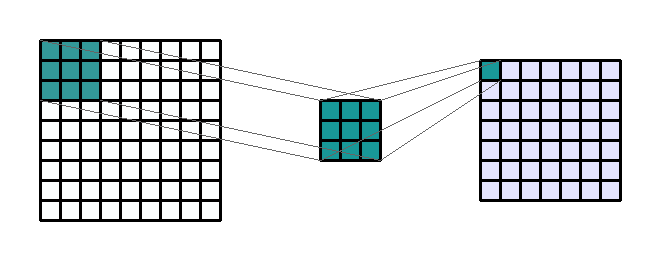

In [9]:
# Build the model
# The first parameter in the Conv2D layer is the number of filters, that is, the dimension of the output space of the previous layer
# The second parameter is the kernel size (specifying the size of the convolution window)

i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = "relu")(i)
x = Conv2D(64, (3, 3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3, 3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)

In [10]:
# Compile and fit

model.compile(optimizer = "adam", 
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5199 - accuracy: 0.8071 - val_loss: 0.4116 - val_accuracy: 0.8456
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3596 - accuracy: 0.8644 - val_loss: 0.3441 - val_accuracy: 0.8713
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3112 - accuracy: 0.8828 - val_loss: 0.3167 - val_accuracy: 0.8830
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2772 - accuracy: 0.8945 - val_loss: 0.3122 - val_accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2525 - accuracy: 0.9045 - val_loss: 0.3109 - val_accuracy: 0.8923
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2329 - accuracy: 0.9117 - val_loss: 0.3029 - val_accuracy: 0.8922
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2162 - accuracy: 0.9182 - val_loss: 0.2963 - val_ac

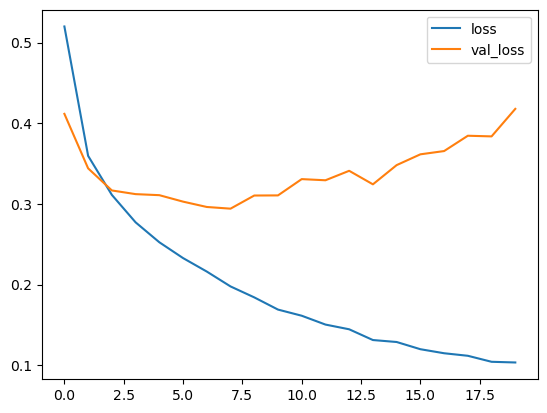

In [11]:
# Plot loss per iteration
# It seems that the model is overfitting. When predictions become more and more incorrect, the loss gets bigger

plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

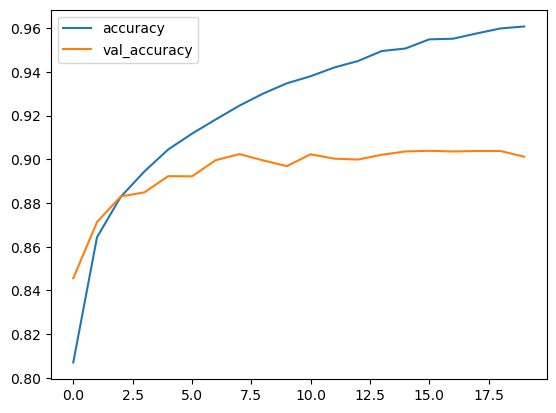

In [12]:
# Plot accuracy per iteration
# The validation accuracy stays steady. This could mean that the model is becoming more confident about its incorrect predictions

plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

### Evaluation

313/313 [==============================] - 1s 3ms/step


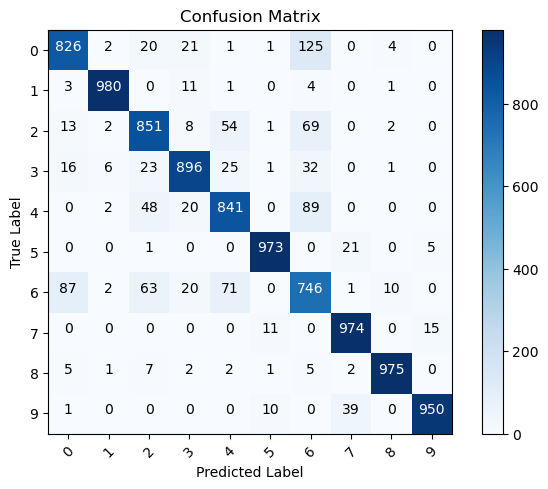

In [13]:
# Plot Confusion Matrix

pred = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, pred)

plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, list(range(10)), rotation = 45)
plt.yticks(tick_marks, list(range(10)))


thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
            horizontalalignment = "center", 
            color = "white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [14]:
# Mapping the Labels

labels = """
T-Shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
""".split()

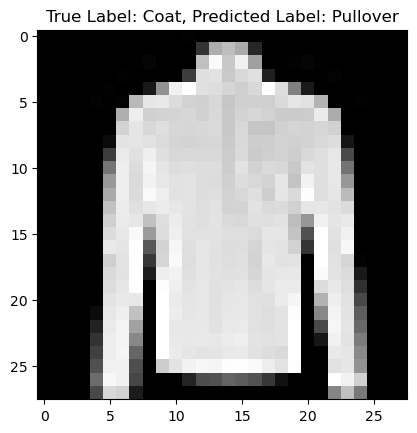

In [15]:
# Show some misclassified examples

misclassified_idx = np.where(pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = "gray")
plt.title(f"True Label: {labels[y_test[i]]}, Predicted Label: {labels[pred[i]]}");